In [22]:
import yfinance as yf
import matplotlib
import sklearn

In [4]:
sp500 = yf.Ticker("^GSPC")

In [5]:
sp500 = sp500.history(period='max')

In [6]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-03 00:00:00-04:00,5623.890137,5623.890137,5504.330078,5528.930176,3866350000,0.0,0.0
2024-09-04 00:00:00-04:00,5506.680176,5552.990234,5503.660156,5520.069824,3478140000,0.0,0.0
2024-09-05 00:00:00-04:00,5520.080078,5546.299805,5480.540039,5503.410156,3521650000,0.0,0.0


In [7]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-08-26 00:00:00-04:00', '2024-08-27 00:00:00-04:00',
               '2024-08-28 00:00:00-04:00', '2024-08-29 00:00:00-04:00',
               '2024-08-30 00:00:00-04:00', '2024-09-03 00:00:00-04:00',
               '2024-09-04 00:00:00-04:00', '2024-09-05 00:00:00-04:00',
               '2024-09-06 00:00:00-04:00', '2024-09-09 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24288, freq=None)

<Axes: xlabel='Date'>

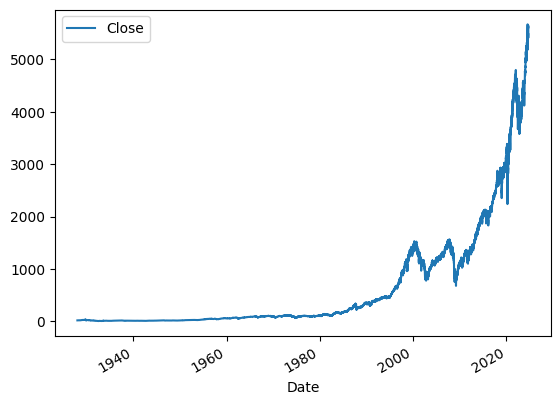

In [12]:
sp500.plot.line(y="Close", use_index = True)

In [14]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [15]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [16]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-09-03 00:00:00-04:00,5623.890137,5623.890137,5504.330078,5528.930176,3866350000,5520.069824
2024-09-04 00:00:00-04:00,5506.680176,5552.990234,5503.660156,5520.069824,3478140000,5503.410156
2024-09-05 00:00:00-04:00,5520.080078,5546.299805,5480.540039,5503.410156,3521650000,5408.419922


In [17]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [18]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-09-03 00:00:00-04:00,5623.890137,5623.890137,5504.330078,5528.930176,3866350000,5520.069824,0
2024-09-04 00:00:00-04:00,5506.680176,5552.990234,5503.660156,5520.069824,3478140000,5503.410156,0
2024-09-05 00:00:00-04:00,5520.080078,5546.299805,5480.540039,5503.410156,3521650000,5408.419922,0


In [19]:
sp500 = sp500.loc["2000-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1
...,...,...,...,...,...,...,...
2024-09-03 00:00:00-04:00,5623.890137,5623.890137,5504.330078,5528.930176,3866350000,5520.069824,0
2024-09-04 00:00:00-04:00,5506.680176,5552.990234,5503.660156,5520.069824,3478140000,5503.410156,0
2024-09-05 00:00:00-04:00,5520.080078,5546.299805,5480.540039,5503.410156,3521650000,5408.419922,0


In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train ["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [29]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [30]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [31]:
precision_score(test["Target"],preds)

np.float64(0.5833333333333334)

In [32]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

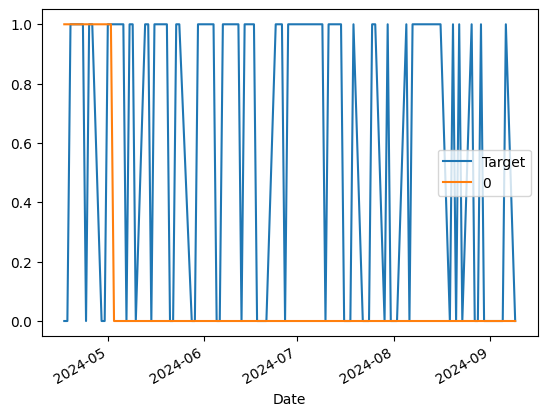

In [33]:
combined.plot()

In [35]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [39]:
def backtest(data, model, predictors, start=2500, step =250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [41]:
predictions = backtest(sp500, model, predictors)

In [42]:
predictions["Predictions"].value_counts()

Predictions
0    1868
1    1842
Name: count, dtype: int64

In [43]:
precision_score(predictions["Target"], predictions["Predictions"])

np.float64(0.5228013029315961)

In [47]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.544474
0    0.455526
Name: count, dtype: float64

In [48]:
horizons = [2,5,60,250,1000]
new_predictors=[]

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ration_column = f"Close_Ration_{horizon}"
    sp500[ration_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ration_column, trend_column]

In [50]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ration_2,Trend_2,Close_Ration_5,Trend_5,Close_Ration_60,Trend_60,Close_Ration_250,Trend_250,Close_Ration_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,1094.040039,1098.469971,1094.040039,1095.890015,356070000,1109.479980,1,1.000845,1.0,1.002176,3.0,1.039354,34.0,1.137825,135.0,0.957328,485.0
2003-12-29 00:00:00-05:00,1095.890015,1109.479980,1095.890015,1109.479980,1058800000,1109.640015,1,1.006162,2.0,1.010755,4.0,1.050761,34.0,1.150837,135.0,0.969445,486.0
2003-12-30 00:00:00-05:00,1109.479980,1109.750000,1106.410034,1109.640015,1012600000,1111.920044,1,1.000072,2.0,1.007835,4.0,1.049591,34.0,1.150046,135.0,0.969833,486.0
2003-12-31 00:00:00-05:00,1109.640015,1112.560059,1106.209961,1111.920044,1027500000,1108.479980,0,1.001026,2.0,1.006997,4.0,1.050463,34.0,1.151439,136.0,0.972073,486.0
2004-01-02 00:00:00-05:00,1111.920044,1118.849976,1105.079956,1108.479980,1153200000,1122.219971,1,0.998451,1.0,1.001263,4.0,1.046073,33.0,1.147024,135.0,0.969348,485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30 00:00:00-04:00,5612.740234,5651.370117,5581.790039,5648.399902,4185850000,5528.930176,0,1.005021,1.0,1.005942,2.0,1.029116,36.0,1.136595,144.0,1.304048,527.0
2024-09-03 00:00:00-04:00,5623.890137,5623.890137,5504.330078,5528.930176,3866350000,5520.069824,0,0.989311,1.0,0.987758,2.0,1.006811,36.0,1.111632,144.0,1.275821,527.0
2024-09-04 00:00:00-04:00,5506.680176,5552.990234,5503.660156,5520.069824,3478140000,5503.410156,0,0.999198,0.0,0.989915,1.0,1.004670,36.0,1.108910,144.0,1.273136,526.0


In [51]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split =50, random_state=1)

In [52]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds>= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [53]:
predictions = backtest(sp500, model, new_predictors)

In [54]:
predictions["Predictions"].value_counts()

Predictions
0.0    2268
1.0     441
Name: count, dtype: int64

In [56]:
precision_score(predictions["Target"], predictions["Predictions"])

np.float64(0.5396825396825397)